<a href="https://colab.research.google.com/github/EddyGiusepe/Usando_Keras_b-sico/blob/main/Basico_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='red'>Usando Keras (Tuturial do YouTube)</font>

O site pode ser encontrado [aqui](https://people.sc.fsu.edu/~jburkardt/datasets/regression/regression.html).

Descrição:

* Este é um Dataset de pressão sanguinia vs idade.
* Usaremos a livraria Keras.

<font color='blue'>Importando livrarias</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD



<font color='blue'>Leitura e visualização dos Dados</font>

In [8]:
datos = pd.read_csv('/content/drive/MyDrive/Apenas_TensorFlow_Eddy/Tutorial_Basico_De_Keras/dataset.csv',
                    sep=",", skiprows=32, usecols=[2,3])

In [10]:
datos.head()

,Age,Systolic blood pressure
0,39,144
1,45,138
2,47,145
3,65,162
4,46,142


Grafiando os Dados!

Ao graficar observamos uma tendencia linear:

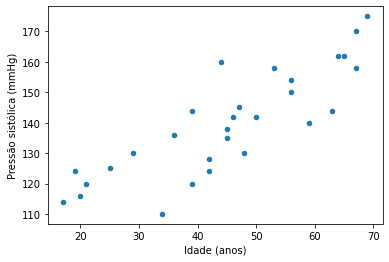

In [12]:
datos.plot.scatter(x='Age', y='Systolic blood pressure')
plt.xlabel('Idade (anos)')
plt.ylabel('Pressão sistólica (mmHg)')
plt.show()

Nossas variáveis:

In [14]:
x = datos['Age'].values
y = datos['Systolic blood pressure'].values

<font color='blue'>Construimos nosso modelo com Keras</font>

* Camada de entrada: 1 dado (cada dado "x" correspondente à idade).

* Camada de saída: 1 dado (cada dado "y" correspondente à regressão linear).

* Função de ativação: 'linear' (porque estamos implementando a regressão linear).

In [15]:
# Para reproduzir o treinamento

np.random.seed(2) 

In [16]:
input_dim = 1
output_dim = 1
modelo = Sequential()
modelo.add(Dense(output_dim, input_dim = input_dim, activation='linear'))

Definição do método de otimização (gradiente descendente), com uma  taxa de aprendizagem de $0.0004$ e uma pérdida igual ao erro quadrático medio.

In [17]:
sgd = SGD(lr=0.0004)
modelo.compile(loss='mse', optimizer=sgd)

In [18]:
# Imprimir na tela a informação do modelo
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


<font color='blue'>Treinamento (regressão linear)</font>

Temos 40\,000 iterações e todos os dados de treinamento ($29$) se usarão em cada iteração (<font color='red'>batch_size = 29</font>)

In [19]:
num_epochs = 40000
batch_size = x.shape[0]
history = modelo.fit(x, y, epochs=num_epochs, batch_size=batch_size, verbose=0)

A seguir, visualizamos nossos resultados de treinamento:

In [20]:
# Imprimir los coeficientes "w" y "b"

capas = modelo.layers[0]
w, b = capas.get_weights()
print('Parámetros: w = {:.1f}, b = {:.1f}'.format(w[0][0],b[0]))

Parámetros: w = 1.0, b = 93.5


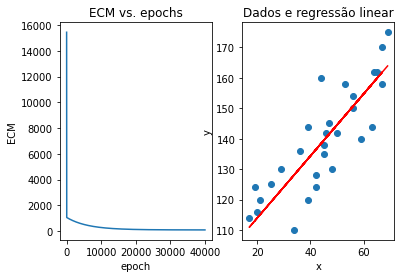

In [27]:
# Graficamos o erro vs épocas e o resultado da regressão superposto aos dados originales
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('ECM')
plt.title('ECM vs. epochs')



y_regr = modelo.predict(x)
plt.subplot(1, 2, 2)
plt.scatter(x,y)
plt.plot(x,y_regr,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dados e regressão linear')
plt.show()

<font color='blue'>Predição</font>

Realizamos algumas predições com nosso modelo Linear.

In [32]:
x_pred = np.array([39])
y_pred = modelo.predict(x_pred)
print("A pressão sanguínea será de {:.1f} mmHg".format(y_pred[0][0]), " para uma pessoa de {} años".format(x_pred[0]))


A pressão sanguínea será de 133.3 mmHg  para uma pessoa de 39 años
